# Ideas and stuff

In [ ]:
'''
Types of variables:
    Player
        Name
        Age
        Strength
        Height
        Picture
        Luck
        Temperament
        Special
    Frisbee Aim
        Horizontal Frisbee Aim
        Vertical Frisbee Aim
            Z Axis Frisbee Aim
    How hard throw
    Wind
        Direction
        Strength
            Variability
    Score
        Shots taken
        Holes Played
    Map
        
000000000B000000000F0000
0000000000000000G000000E
A00000000C0000H0000X0000
0000000000000000I000000K
000000000D000000000J0000


Static variables
    Gravity

Enter name
Present picture of hole


'''

# Functions

In [1]:
#Defines the method for showing maps
#Provides a tuple for the map area
%pylab inline
%matplotlib inline

import time
import pylab as pl
from IPython import display

def Show_Map(x):
    return plt.imshow(plt.imread(x))

TupMap = ('Frisbee Golf\Map\A.jpg', 'Frisbee Golf\Map\B.jpg', 'Frisbee Golf\Map\C.jpg', 'Frisbee Golf\Map\D.jpg', 'Frisbee Golf\Map\E.jpg', 'Frisbee Golf\Map\F.jpg', 'Frisbee Golf\Map\G.jpg', 'Frisbee Golf\Map\H.jpg', 'Frisbee Golf\Map\I.jpg', 'Frisbee Golf\Map\J.jpg', 'Frisbee Golf\Map\K.jpg')


Populating the interactive namespace from numpy and matplotlib


In [2]:
#Returns the sin/cos of input in degrees
def make_sin(x):
    return math.sin(float(x)/57.2957795)

def make_cos(x):
    return math.cos(float(x)/57.2957795)

In [3]:
#Defines the player dictionary

#Chooses player

ThePlayer = {'Name':None,'Age':None,'Strength':None,'Height':None,'Picture':None,'Luck':None,'Temperament':None,'Special':None, 'Saying':None}

def Pick_Player(x):
    ValidPlayers = ["Brad", "Chris", "Nick", "Todd"]
    if x in ValidPlayers:
        if x=="Brad":
            ThePlayer['Name'] = x
            ThePlayer['Age'] = 30
            ThePlayer['Strength'] = 100
            ThePlayer['Height'] = 1.8
            ThePlayer['Picture'] = 'Frisbee Golf\Art\Brad.png'
            ThePlayer['Luck'] = 95
            ThePlayer['Temperament'] = 105
            ThePlayer['Special'] = 'listening to 90s music'
            ThePlayer['Saying'] = 'radical!'
            return
        elif x=="Chris":
            ThePlayer['Name'] = x
            ThePlayer['Age'] = 29
            ThePlayer['Strength'] = 85
            ThePlayer['Height'] = 1.7
            ThePlayer['Picture'] = 'Frisbee Golf\Art\Chris.png'
            ThePlayer['Luck'] = 110
            ThePlayer['Temperament'] = 110
            ThePlayer['Special'] = 'the BainesTree'
            ThePlayer['Saying'] = '...................'
            return
        elif x=="Nick":
            ThePlayer['Name'] = x
            ThePlayer['Age'] = 30
            ThePlayer['Strength'] = 95
            ThePlayer['Height'] = 2.0
            ThePlayer['Picture'] = 'Frisbee Golf\Art\Nick.png'
            ThePlayer['Luck'] = 95
            ThePlayer['Temperament'] = 95
            ThePlayer['Special'] = 'inventing new shit'
            ThePlayer['Saying'] = 'yeeeeeeeha!'
            return
        elif x=="Todd":
            ThePlayer['Name'] = x
            ThePlayer['Age'] = 29
            ThePlayer['Strength'] = 90
            ThePlayer['Height'] = 1.8
            ThePlayer['Picture'] = 'Frisbee Golf\Art\Todd.png'
            ThePlayer['Luck'] = 95
            ThePlayer['Temperament'] = 100
            ThePlayer['Special'] = 'occassionally playing'
            ThePlayer['Saying'] = 'its time to kick ass as chew gum, and im all out of gum!'
            return
    else:
        #Add occurance if it's not a valid choice
        pass
    

In [4]:
def Wind(x,y,wordwindspeed,wordwinddir):
    #Set Speed
    x= randint(0,x)
    #Set Direction
    y=(randint(0,y)*(360/y))
  
    Conditions_wind= ('no wind at all', 'a slight wind', 'some wind','a wind','a lot of wind')
    wordwindspeed = Conditions_wind[x]
    
    
    if y>= 315 or y< 45:
        wordwinddir = 'helping you from behind'
    elif y>= 45 or y< 135:
        wordwinddir = 'sending the frisbee right'
    elif y> 135 or y<225:
        wordwinddir = 'working against you from the front'
    elif y> 225 or y<315:
        wordwinddir = 'sending the frisbee left'

    return x,y,wordwindspeed,wordwinddir


In [30]:
#Throw Stats
#Turns throw input into a friendly tuple

def throw(Vthrowx, Pthrowx, PS, PH):
    T_A = float(Vthrowx)
    T_V = ((float(Pthrowx) * float(PS))/300)
    P_H = float(PH)
    return T_V,T_A,P_H


#For any given throw tuple (Velocity, Vertical Angle, Player Height) 
#return distance and time
#http://www.convertalot.com/ballistic_trajectory_calculator.html

def throw_dist_time(ts1,ts2,ts3):
    #Velocity
    vo=ts1
    #Angle
    T_A=ts2
    #Player height
    yo=ts3

    xo=0
    vxo=0
    t=0
    vyo=0
    g=9.8

    #x = xo + vxo*t
    #y = yo + vyo*t - 0.5*g*(t**2)
    vxo = vo*make_cos(T_A)
    vyo = vo*make_sin(T_A)

    #vy = vyo - g*tflight
    trise = vyo/g
    h = yo + vyo*trise - 0.5*g*(trise**2)
    tfall = sqrt(2*h/g)

    tflight = trise + tfall 
    total_range = vxo*tflight

    return total_range, tflight



#Returns the temporary throw coordinates before wind is applied

def coord_after_throw(Throw_Coord,total_range,direction):
    
    x = Throw_Coord[0] + total_range*make_sin(direction)
    y = Throw_Coord[1] + total_range*make_cos(direction)    
    
    return x,y




#Returns the temporary throw coordinates before wind is applied
#May need another level in the future which either tracks the throw, or does collision detection?

def coord_after_wind(Throw_Coord,time,windspeed,winddirection):
      
    x = Throw_Coord[0] + time*windspeed*make_sin(winddirection)
    y = Throw_Coord[1] + time*windspeed*make_cos(winddirection)
    
    return x,y


#Works out the distance between two coordinates using pythagorus theorum
#a^2 + b^2 = c^2

def distance_to_goal(Throw_Coord, Goal_Coord):
    ax=((Goal_Coord[0] - Throw_Coord[0])**2)
    bx=((Goal_Coord[1] - Throw_Coord[1])**2)
    return sqrt(ax+bx)

#Determines the text after throw and next action

def result_of_throw(x):
    if x<0.5:
        Closeness="Hole in one!"
    elif x<float(ThePlayer['Height']):
        Closeness="Within Gimme Range, score 2"
    elif x<10:
        Closeness="Only " + str(x) + "m until goal"
    else:
        Closeness="Your shot was poor, you are " + str(x) + "m until goal"    
    return Closeness


In [33]:
#Helps choose the character and provides text and picture output

def character_select():


    print "Welcome to Nick's Frisbee Golf Challenge"

    Pick_Player(raw_input("First, choose your player (Brad/Chris/Nick/Todd)"))
    print("You have chosen "+ ThePlayer['Name'] +". He is " + str(ThePlayer['Age']) +" years old and " + str(ThePlayer['Height']) +" metres tall.")
    print("Here is a picture of him")
    print(ThePlayer['Name']+'s special ability is ' + ThePlayer['Special'])

    Pic = plt.imread(ThePlayer['Picture'])
    plt.imshow(Pic)

    return

# Character Select Screen

Welcome to Nick's Frisbee Golf Challenge
First, choose your player (Brad/Chris/Nick/Todd)Nick
You have chosen Nick. He is 30 years old and 2.0 metres tall.
Here is a picture of him
Nicks special ability is inventing new shit


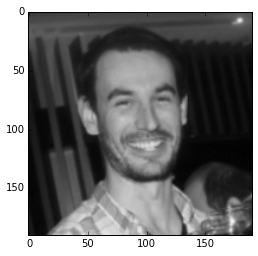

In [34]:
character_select()

# Hole setup

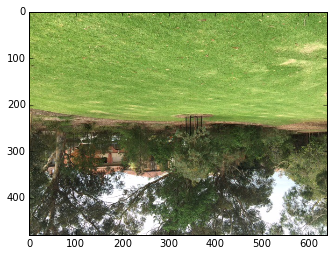

KeyboardInterrupt: 

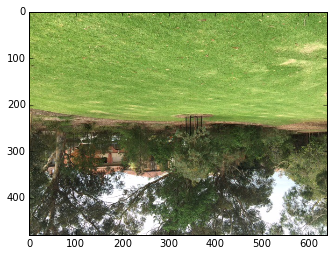

In [35]:

for i in range(len(TupMap)):
    Show_Map(TupMap[i])
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1.0)
    
display.clear_output(wait=True)

Conditions = Wind(5,360, 'None','None')
Goal_Coord=(0,40)
Throw_Coord = (0,0)

print("Today on the course there is " + Conditions[2] + " with the wind " + Conditions[3] + ". There are no dogs on the course today.")
print(ThePlayer['Name'] + ' says ' + ThePlayer['Saying'])

Show_Map(TupMap[0])

# First Shot

In [29]:

print("You are currently aiming directly at the target. It is " + str(distance_to_goal(Goal_Coord,Throw_Coord)) + "m to the target")
Hthrow = raw_input("Change your horizontal direction? Numbers indicate distance away from the target, use '-' for left:")
Vthrow = float(raw_input("Change your vertical direction? You are currently aiming at the horizon which is your height:"))
Pthrow = raw_input("How hard do you want to throw your frisbee? Ideal is 100% ie 100:")



You are currently aiming directly at the target. It is 40.0m to the target
Change your horizontal direction? Numbers indicate distance away from the target, use '-' for left:-45
Change your vertical direction? You are currently aiming at the horizon which is your height:15
How hard do you want to throw your frisbee? Ideal is 100% ie 100:70


# Calculating throw

In [22]:
##Next part;

#Show picture roughly where frisbee landed
#instigate a second frisbee shot

Throw_Coord



(1.5691773648135128, 35.880954239681813)

In [31]:
throwstats = throw(Vthrow, Pthrow, ThePlayer['Strength'], ThePlayer['Height'])

throweffect = throw_dist_time(throwstats[0],throwstats[1],throwstats[2])

Throw_Coord = coord_after_throw(Throw_Coord,throweffect[0],Hthrow)

Throw_Coord = coord_after_wind(Throw_Coord,throweffect[1],Conditions[0],Conditions[1])

distance_remaining = distance_to_goal(Throw_Coord,Goal_Coord)

result_of_throw(distance_remaining)

'Your shot was poor, you are 26.042083858m until goal'